In [1]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

from os import listdir
from os.path import isfile, join

import scipy.io as sio
import tables

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········


MFPT dataset with the Nominal "No Fault" Data
3 Baseline conditions -

1.   constant load of 270 lbs 
2.   Input Shaft Rate of 25 Hz
3.   Sampling Rate of 97.656 kHz


In [ ]:
file_path = 'drive/My Drive/MFPT Fault Data Sets/1 - Three Baseline Conditions/'
onlyfiles = [f for f in listdir(file_path) if isfile(join(file_path, f))]
print(onlyfiles)

['baseline_2.mat', 'baseline_3.mat', 'baseline_1.mat']


In [ ]:
#Function for converting array to list
def arrtolistgdataB(matarr):
  p11 = matarr['bearing'][:,0]['gs'].tolist()
  return p11[0].tolist()

In [ ]:
#Function for extracting g data array
def arrtolistgdataALT(matarr):
  p11 = matarr['bearing'][:,0]['gs']
  return p11[0]

In [ ]:
#Reading data from folder
merged_G_3BL_data = pd.DataFrame()
for filename in os.listdir(file_path):
     if filename.endswith('.mat'):
       print(filename)
       datadict = sio.loadmat(os.path.join(file_path, filename))
       time1 = datadict['__header__'][50:]
       Gdata1 = arrtolistgdataALT(datadict)
       #merged_G_3BL_data["Load"] = "Fixed"
       #merged_G_3BL_data[time1] = Gdata

baseline_2.mat
baseline_3.mat
baseline_1.mat


In [ ]:
p1 = datadict['bearing']['sr'].tolist()
psr1 = p1[0][0][0][0]
print("The Sampling Rate in Hz: ", psr1)

The Sampling Rate in Hz:  97656


In [ ]:
p111 = datadict['bearing'][:, 0]['load'].tolist()
print("Baseline Data for a Constant load in lbs: ", p111[0].tolist()[0][0])

Baseline Data for a Constant load in lbs:  270


In [ ]:
display(merged_G_3BL_data.head())
display(Gdata1)

""


array([[ 0.8315881],
       [ 0.0387017],
       [ 0.4676445],
       ...,
       [-0.8111974],
       [-0.3338806],
       [-0.4876291]])

In [ ]:
range_of_samples = range(0, int(psr1/10))
display(range_of_samples)

plt.xlabel("time $(s)$")
plt.ylabel("acceleration $(m/s^2)$")
plt.title('Nominal state(No Fault)')
plt.plot(Gdata1[range_of_samples])
plt.suptitle('Acceleration data')
plt.show()

1/10th of a sampling rate of 97656 Hz is 9765.6 Hz or 9.7656 kHz.
Sampling rate is per second.
So plotting done for 1/10th of a second.

MFPT Dataset with 3 Outer Race(OR) Fault conditions - 
1.   constant load of 270 lbs 
2.   Input Shaft Rate of 25 Hz
3.   Sampling Rate of 97.656 kHz

In [ ]:
#The files present in the folder
file_path2 = 'drive/My Drive/MFPT Fault Data Sets/2 - Three Outer Race Fault Conditions/'
onlyfiles = [f for f in listdir(file_path2) if isfile(join(file_path2, f))]
print(onlyfiles)

['cyclostat.tif', 'OuterRaceFault_1.mat', 'OuterRaceFault_2.mat', 'OuterRaceFault_3.mat']


In [ ]:
#Not working not needed the general one works now for both 23-08-2020
#def arrtolistgdata(matarr):
  #p22 = matarr['bearing']['gs'].tolist()
  #return p22[0]

In [ ]:
merged_G_3OR_data = pd.DataFrame()
for filename2 in os.listdir(file_path2):
     if filename2.endswith('.mat'):
       print(filename2)
       datadict2 = sio.loadmat(os.path.join(file_path2, filename2))
       time2 = datadict2['__header__'][50:]
       Gdata2 = arrtolistgdataALT(datadict2)
       #merged_G_3OR_data[time2] = Gdata2
       #merged_G_3OR_data["Load"] = "Fixed"

OuterRaceFault_1.mat
OuterRaceFault_2.mat
OuterRaceFault_3.mat


In [ ]:
p2 = datadict2['bearing']['sr'].tolist()
psr2 = p2[0][0][0][0]
print("The Sampling Rate in Hz: ", psr2)

The Sampling Rate in Hz:  97656


In [ ]:
display(Gdata2)

array([[ 0.718744 ],
       [ 0.4493211],
       [-0.975775 ],
       ...,
       [ 0.907281 ],
       [ 2.090778 ],
       [ 1.042275 ]])

MFPT Dataset with 7 Outer Race(OR) conditions - 
1.   Variable load of 25, 50, 100, 150, 200, 250 and 300 lbs 
2.   Input Shaft Rate of 25 Hz
3.   Sampling Rate of 48.828 kHz for 3 seconds (bearing resonance was found be less than 20 kHz)

In [ ]:
#The files present in the folder
file_path3 = 'drive/My Drive/MFPT Fault Data Sets/3 - Seven More Outer Race Fault Conditions/'
onlyfiles = [f for f in listdir(file_path3) if isfile(join(file_path3, f))]
print(onlyfiles)

['OuterRaceFault_vload_3.mat', 'OuterRaceFault_vload_2.mat', 'OuterRaceFault_vload_1.mat', 'OuterRaceFault_vload_5.mat', 'OuterRaceFault_vload_4.mat', 'OuterRaceFault_vload_6.mat', 'OuterRaceFault_vload_7.mat']


In [ ]:
merged_G_7OR_data = pd.DataFrame()
for filename3 in os.listdir(file_path3):
     if filename3.endswith('.mat'):
       print(filename3)
       datadict3 = sio.loadmat(os.path.join(file_path3, filename3))
       time3 = datadict3['__header__'][50:]
       Gdata3 = arrtolistgdataALT(datadict3)
       #merged_G_7OR_data[time3] = Gdata3
       #p333 = datadict3['bearing']['load'].tolist()
       #display(p333[0][0][0])
       #merged_G_7OR_data["Load"] = "Variable"

OuterRaceFault_vload_3.mat
OuterRaceFault_vload_2.mat
OuterRaceFault_vload_1.mat
OuterRaceFault_vload_5.mat
OuterRaceFault_vload_4.mat
OuterRaceFault_vload_6.mat
OuterRaceFault_vload_7.mat


In [ ]:
display(Gdata3)
#display(pd.unique(merged_G_7OR_data['Load (lbs)']))
#display(datadict3)

array([[ 0.7525849],
       [-1.331141 ],
       [-1.530163 ],
       ...,
       [-2.682427 ],
       [-2.692087 ],
       [ 0.8874564]])

In [ ]:
p3 = datadict3['bearing']['sr'].tolist()
psr3 = p3[0][0][0][0]
print("The Sampling Rate in Hz: ", psr3)

The Sampling Rate in Hz:  48828


MFPT Dataset with 7 Inner Race(IR) conditions -

1. Variable load of 0, 50, 100, 150, 200, 250 and 300 lbs
2. Input Shaft Rate of 25 Hz
3. Sampling Rate of 48.828 kHz for 3 seconds (bearing resonance was found be less than 20 kHz)

In [ ]:
#The files present in the folder
file_path4 = 'drive/My Drive/MFPT Fault Data Sets/4 - Seven Inner Race Fault Conditions/'
onlyfiles = [f for f in listdir(file_path4) if isfile(join(file_path4, f))]
print(onlyfiles)

['innerRaceFaultTime.tif', 'innerRaceFaultTime.png', 'innerRaceFaultTime.fig', 'InnerRaceFault_vload_3.mat', 'InnerRaceFault_vload_2.mat', 'InnerRaceFault_vload_1.mat', 'InnerRace.fig', 'InnerRaceFault_vload_5.mat', 'InnerRaceFault_vload_4.mat', 'InnerRaceFault_vload_6.mat', 'InnerRaceFault_vload_7.mat']


In [ ]:
merged_G_7IR_data = pd.DataFrame()
for filename4 in os.listdir(file_path4):
     if filename4.endswith('.mat'):
       print(filename4)
       datadict4 = sio.loadmat(os.path.join(file_path4, filename4))
       time4 = datadict4['__header__'][50:]
       Gdata4 = arrtolistgdataALT(datadict4)
       #merged_G_7IR_data[time4] = Gdata4
       #p444 = datadict4['bearing']['load'].tolist()
       #display(p444[0][0][0])
       #merged_G_7IR_data["Load"] = "Variable"

InnerRaceFault_vload_3.mat
InnerRaceFault_vload_2.mat
InnerRaceFault_vload_1.mat
InnerRaceFault_vload_5.mat
InnerRaceFault_vload_4.mat
InnerRaceFault_vload_6.mat
InnerRaceFault_vload_7.mat


In [ ]:
display(Gdata4)

array([[ 0.5548925],
       [-0.7656413],
       [-0.605137 ],
       ...,
       [ 0.1271065],
       [ 0.7603007],
       [-1.077655 ]])

In [ ]:
p4 = datadict4['bearing']['sr'].tolist()
psr4 = p4[0][0][0][0]
print("The Sampling Rate in Hz: ", psr4)

The Sampling Rate in Hz:  48828


range(0, 9765)

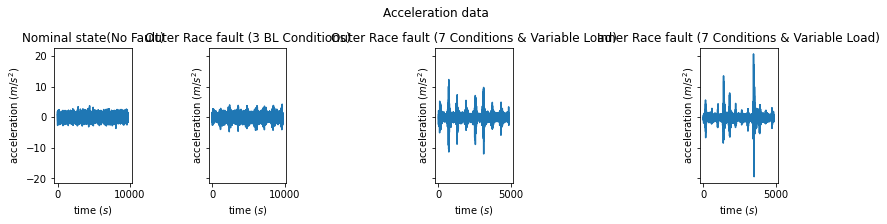

In [ ]:
range_of_samples = range(0, int(psr1/10))
display(range_of_samples)
range_of_samples3 = range(0, int(psr3/10))

fig, (plt1, plt2, plt3, plt4) = plt.subplots(1, 4, sharey = True, figsize=(12,3), constrained_layout=True)

plt1.set_xlabel("time $(s)$")
plt1.set_ylabel("acceleration $(m/s^2)$")
plt1.set_title('Nominal state(No Fault)')
plt1.plot(Gdata1[range_of_samples])

plt2.set_xlabel("time $(s)$")
plt2.set_ylabel("acceleration $(m/s^2)$")
plt2.set_title('Outer Race fault (3 BL Conditions)')
plt2.plot(Gdata2[range_of_samples])

plt3.set_xlabel("time $(s)$")
plt3.set_ylabel("acceleration $(m/s^2)$")
plt3.set_title('Outer Race fault (7 Conditions & Variable Load)')
plt3.plot(Gdata3[range_of_samples3])

plt4.set_xlabel("time $(s)$")
plt4.set_ylabel("acceleration $(m/s^2)$")
plt4.set_title('Inner Race fault (7 Conditions & Variable Load)')
plt4.plot(Gdata4[range_of_samples3])

plt.suptitle('Acceleration data')
plt.show()

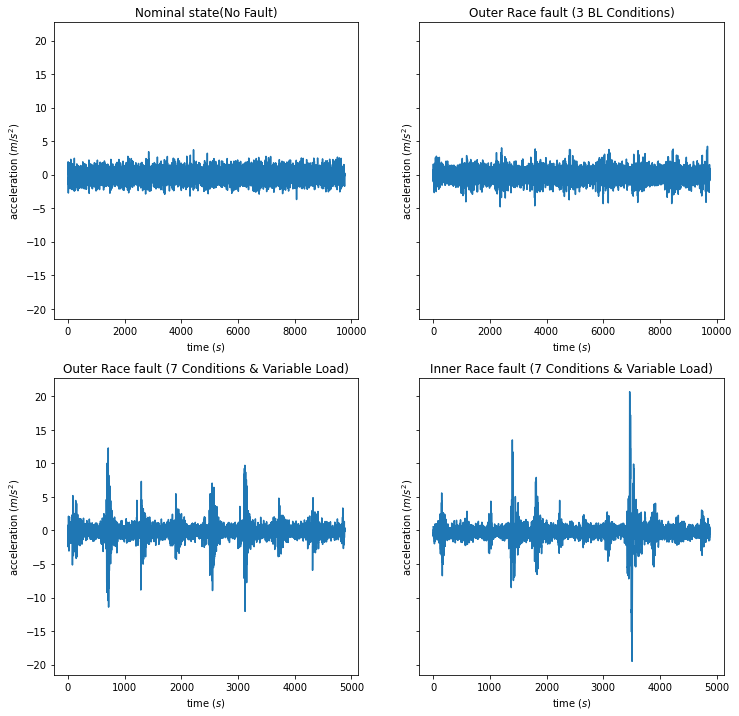

In [ ]:
fig, axs = plt.subplots(2, 2, sharey=True, figsize=(12, 12))

axs[0, 0].plot(Gdata1[range_of_samples])
axs[0, 0].set_title('Nominal state(No Fault)')

axs[0, 1].plot(Gdata2[range_of_samples])
axs[0, 1].set_title('Outer Race fault (3 BL Conditions)')

axs[1, 0].plot(Gdata3[range_of_samples3])
axs[1, 0].set_title('Outer Race fault (7 Conditions & Variable Load)')

axs[1, 1].plot(Gdata4[range_of_samples3])
axs[1, 1].set_title('Inner Race fault (7 Conditions & Variable Load)')

for ax in axs.flat:
    ax.set(xlabel='time $(s)$', ylabel='acceleration $(m/s^2)$')

# Hide x labels and tick labels for top plots and y ticks for right plots.
#for ax in axs.flat:
    #ax.label_outer()

In [ ]:
label_time = [time1, time2, time3]

In [ ]:
label = ['NominalFixedL', 'ORFixedL', 'ORVariableL', 'IRVariableL']

In [ ]:
def time_signal(file, code):
    """
    load the time series in the file and convert units in SI
    file= 'filename' from the ./dataset/ folder
    code= ' DE' or 'FE', other code will give error
    """
    import re
    try:
        import scipy.io as sio
        data = sio.loadmat(f"/content/baseline_1.mat")
        for key in data:
            if re.findall(rf"({code})", key):
                dict_code = key
        unit_conv = 0.0254
        x = data[dict_code] * unit_conv
        return x
    except:
        print('File does not exist or code wrong. Code must be "Bearing" ')